In [1]:
    import numpy as np
    import pandas as pd
    from matplotlib import pyplot as plt
    import seaborn as sns

## Learning Objectives
The primary objective of clustering is to group items within a dataset based on similarity. **k-Means Clustering** is one of the most popular and easy to use clustering approaches. With k-Means Clustering, similarity is based on a distance metric known as euclidean distance. By the end of this tutorial, you will have learned: 
+ How to import, explore and prepare data for k-Means Clustering
+ How to segment data using k-Means Clustering
+ How to evaluate and visualize clusters
+ How to choose an appropriate number of clusters
+ How to analyze the results of k-Means Clustering

## 1. Collect the Data
Let's import and preview it:

In [2]:
import pandas as pd
customerData = pd.read_csv("mallcustomers.csv")
customerData.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


## 2. Explore the Data
Next, let's get a concise summary of the structure and the values within the dataset:

In [3]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
customerData.describe(include = 'all').round(2)

,CustomerID,Gender,Age,Income,SpendingScore
count,200.00,200,200.00,200.00,200.00
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.50,NaN,38.85,60560.00,50.20
std,57.88,NaN,13.97,26264.72,25.82
min,1.00,NaN,18.00,15000.00,1.00
25%,50.75,NaN,28.75,41500.00,34.75
50%,100.50,NaN,36.00,61500.00,50.00
75%,150.25,NaN,49.00,78000.00,73.00


A visual exploration of the dataset can provide us with some additional insight.

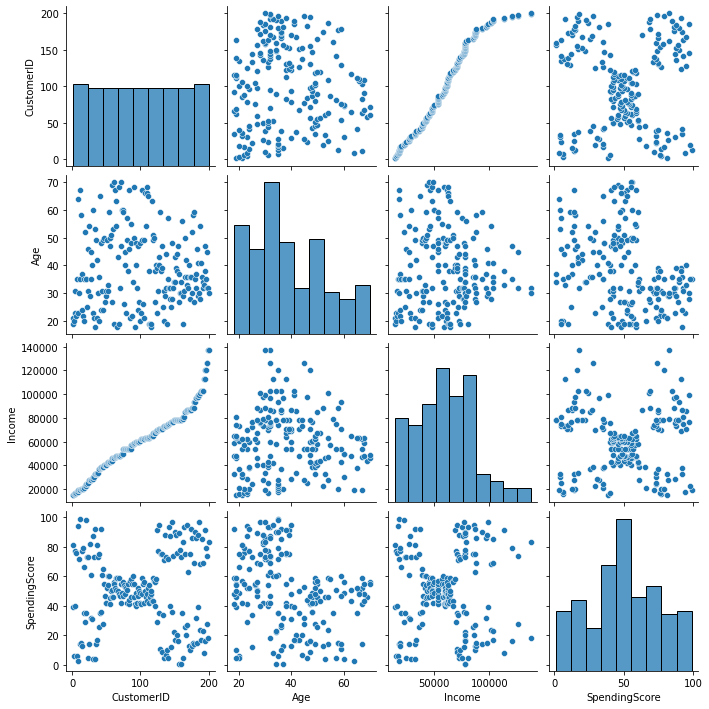

In [5]:
sns.pairplot(customerData)

In [6]:
customerData.isna().sum()

## no missing values found

CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64

## 3. Prepare the Data

In [7]:
customerData_scaled = pd.DataFrame()
for i in ["Age","Income","SpendingScore"]:
    customerData_scaled[i] = (customerData[i]-customerData[i].mean())/customerData[i].std()

# Z-score transformation of continuous features

In [8]:
customerData_scaled[(customerData_scaled["Age"]>3) |(customerData_scaled["Age"]<-3)|
                   (customerData_scaled["Income"]>3) |(customerData_scaled["Income"]<-3)|
                   (customerData_scaled["SpendingScore"]>3) |(customerData_scaled["SpendingScore"]<-3)]

## no Outliers found

,Age,Income,SpendingScore


#### Note: K-Means clustering cannot be used in case there are outliers 
##### Removing outliers is the better approach than trying to cluster them separately

## 3. Create the Clusters

In [9]:
customerData_scaled

,Age,Income,SpendingScore
0,-1.421003,-1.734646,-0.433713
1,-1.277829,-1.734646,1.192711
2,-1.349416,-1.696572,-1.711618
3,-1.134655,-1.696572,1.037814
4,-0.561958,-1.658498,-0.394989
...,...,...,...
195,-0.275610,2.263112,1.115262
196,0.440260,2.491555,-0.859681
197,-0.490371,2.491555,0.921640
198,-0.490371,2.910368,-1.246925


In [10]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, n_init = 25, random_state = 1234)

# k -> n_cluster
#Number of time the k-means algorithm will be run with different centroid seeds.

# fit the algorithm to the data
km = km.fit(customerData_scaled)

clusterLabels = km.labels_
clusterWCSS = km.inertia_ # this is the total within cluster sum of squares

In [11]:
clusterLabels

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1])

## 4. Evaluate and Visualize the Clusters 

In [12]:
## tabulation of the size of the clusters

pd.Series(km.labels_).value_counts().sort_index()

0    91
1    41
2    68
dtype: int64

In [14]:
## 'km.cluster_centers_' :gives the cluster centroids

cluster_centers = pd.DataFrame(km.cluster_centers_, 
                               columns = ['Age','Income', 'SpendingScore'])
display(cluster_centers)

# to get the correct centroids, we need to un-scale the data,

cluster_centers_unscaled = pd.DataFrame()
for i in ["Age","Income","SpendingScore"]:
    cluster_centers_unscaled[i] = (cluster_centers[i]*customerData[i].std()) + customerData[i].mean()

display(cluster_centers_unscaled)

,Age,Income,SpendingScore
0,0.889449,0.047295,-0.619250
1,-0.429260,1.019674,1.153042
2,-0.931474,-0.678096,0.133485


,Age,Income,SpendingScore
0,51.274725,61802.197802,34.208791
1,32.853659,87341.463415,79.975610
2,25.838235,42750.000000,53.647059


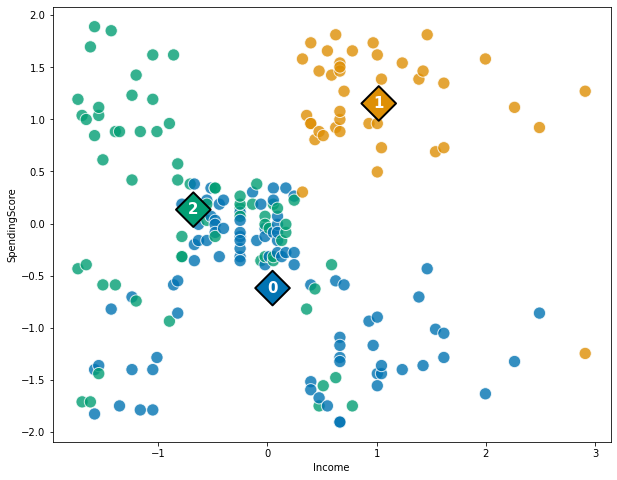

In [15]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = customerData_scaled,
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = km.labels_, 
                     palette = 'colorblind', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = cluster_centers.index, 
                     palette = 'colorblind', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.Income[i], 
                        y = cluster_centers.SpendingScore[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

## 5. Choose the right number of Clusters

### The Elbow Method using Within Cluster Sum of Squares (WCSS)

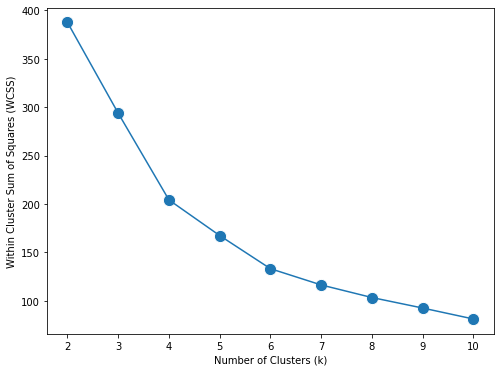

In [16]:
wcss = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customerData_scaled)
    wcss.append(km.inertia_)

wcss_series = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Within Cluster Sum of Squares (WCSS)')

### The Average Silhouette Score

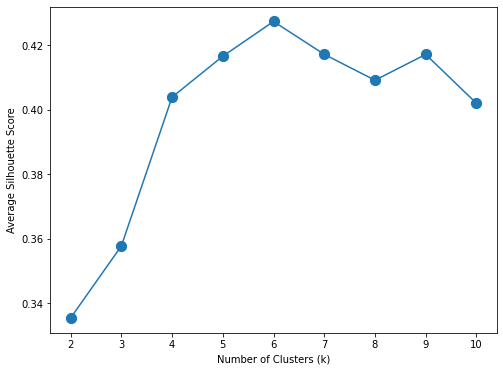

In [17]:
from sklearn.metrics import silhouette_score

silhouette = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customerData_scaled)
    silhouette.append(silhouette_score(customerData_scaled, km.labels_))

silhouette_series = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = silhouette_series, x = silhouette_series.index)
ax = sns.scatterplot(y = silhouette_series, x = silhouette_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Average Silhouette Score')

### The Calinski Harabasz Score

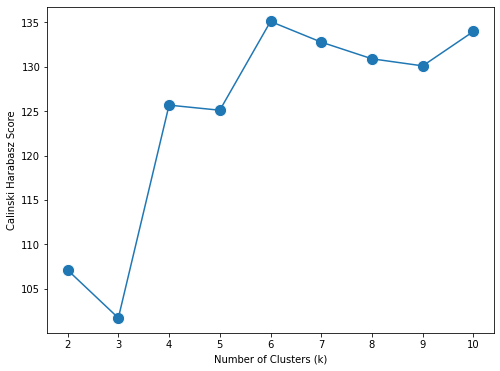

In [18]:
from sklearn.metrics import calinski_harabasz_score

calinski = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customerData_scaled)
    calinski.append(calinski_harabasz_score(customerData_scaled, km.labels_))

calinski_series = pd.Series(calinski, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = calinski_series, x = calinski_series.index)
ax = sns.scatterplot(y = calinski_series, x = calinski_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Calinski Harabasz Score')

## 6. Analyze and Interpret the Clusters

0    21
1    33
2    38
3    24
4    39
5    45
dtype: int64

,Age,Income,SpendingScore
0,0.477758,-1.304955,-1.193449
1,0.221161,1.080514,-1.286823
2,-0.870913,-0.113500,-0.093346
3,-0.973584,-1.322179,1.034586
4,-0.440811,0.989101,1.236400
5,1.251580,-0.239612,-0.043888


,Age,Income,SpendingScore
0,45.523810,26285.714286,19.380952
1,41.939394,88939.393939,16.969697
2,26.684211,57578.947368,47.789474
3,25.250000,25833.333333,76.916667
4,32.692308,86538.461538,82.128205
5,56.333333,54266.666667,49.066667


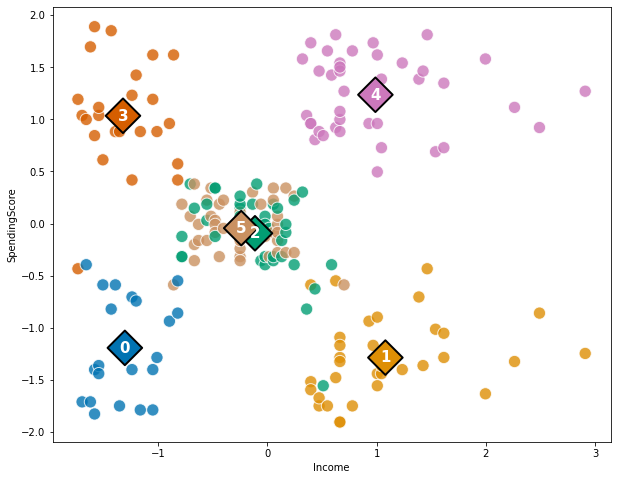

In [19]:
km = KMeans(n_clusters = 6, n_init = 25, random_state = 34)
km.fit(customerData_scaled)

display(pd.Series(km.labels_).value_counts().sort_index())

## 'km.cluster_centers_' :gives the cluster centroids

cluster_centers = pd.DataFrame(km.cluster_centers_, 
                               columns = ['Age','Income', 'SpendingScore'])
display(cluster_centers)

# to get the correct centroids, we need to un-scale the data,

cluster_centers_unscaled = pd.DataFrame()
for i in ["Age","Income","SpendingScore"]:
    cluster_centers_unscaled[i] = (cluster_centers[i]*customerData[i].std()) + customerData[i].mean()

display(cluster_centers_unscaled)

# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = customerData_scaled,
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = km.labels_, 
                     palette = 'colorblind', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = cluster_centers.index, 
                     palette = 'colorblind', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.Income[i], 
                        y = cluster_centers.SpendingScore[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

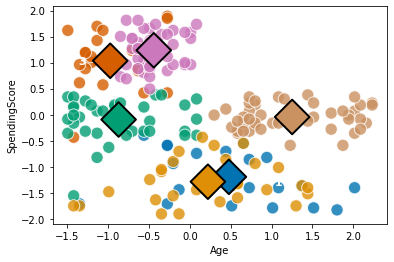

In [20]:
#Plot the Clusters
ax = sns.scatterplot(data = customerData_scaled,
                     x = 'Age',
                     y = 'SpendingScore', 
                     hue = km.labels_, 
                     palette = 'colorblind', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'Age',
                     y = 'SpendingScore', 
                     hue = cluster_centers.index, 
                     palette = 'colorblind', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.Income[i], 
                        y = cluster_centers.SpendingScore[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 11,
                        weight = 'bold',
                        color = 'white')

# 7. Adding cluster labels to the data and exploring further

In [21]:
customerData['Cluster'] = km.labels_.tolist()
customerData.head(10)

,CustomerID,Gender,Age,Income,SpendingScore,Cluster
0,1,Male,19,15000,39,3
1,2,Male,21,15000,81,3
2,3,Female,20,16000,6,0
3,4,Female,23,16000,77,3
4,5,Female,31,17000,40,0
5,6,Female,22,17000,76,3
6,7,Female,35,18000,6,0
7,8,Female,23,18000,94,3
8,9,Male,64,19000,3,0
9,10,Female,30,19000,72,3


In [22]:
customerData=pd.get_dummies(customerData)
customerData.head(10)

,CustomerID,Age,Income,SpendingScore,Cluster,Gender_Female,Gender_Male
0,1,19,15000,39,3,0,1
1,2,21,15000,81,3,0,1
2,3,20,16000,6,0,1,0
3,4,23,16000,77,3,1,0
4,5,31,17000,40,0,1,0
5,6,22,17000,76,3,1,0
6,7,35,18000,6,0,1,0
7,8,23,18000,94,3,1,0
8,9,64,19000,3,0,0,1
9,10,30,19000,72,3,1,0


In [23]:
customerData.agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'}).round(2)

Gender_Female        0.56
Gender_Male          0.44
Age                 36.00
Income           61500.00
SpendingScore       50.00
dtype: float64

In [24]:
customerData.groupby('Cluster').agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'}).round(2)

,Gender_Female,Gender_Male,Age,Income,SpendingScore
Cluster,,,,,
0,0.62,0.38,46.0,25000.0,15.0
1,0.42,0.58,43.0,86000.0,16.0
2,0.63,0.37,26.0,60000.0,49.5
3,0.58,0.42,23.5,24500.0,76.5
4,0.54,0.46,32.0,79000.0,83.0
5,0.58,0.42,54.0,54000.0,49.0


#### Following inisghts are subject to analyser's perspective

#### What actionable insights can you come up with based on the clustering results?

In terms of a customer relations strategy, it would make sense to:
1. Invest in increasing the spending of the high earning low spending customers in cluster 1.
2. Keep the high earning, high spending customers in cluster 2 happy.
3. Keep a watchful eye on the low earning, high spending customers in cluster 3.
